In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
iris_data = pd.read_csv('/content/iris.csv')

In [3]:
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

In [4]:
# Split into training and testing sets (80% train, 20% test)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Euclidean distance function
def euclidean_distance(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return np.sqrt(distance)

In [6]:
# K-NN Prediction function
def knn_predict(train_X, train_y, test_point, k):
    distances = []

    # Calculate distance between the test point and all training points
    for i in range(len(train_X)):
        dist = euclidean_distance(test_point, train_X[i])
        distances.append((train_y[i], dist))

    # Sort the distances by the smallest distance first
    distances.sort(key=lambda x: x[1])

    # Get the labels of the k closest neighbors
    k_nearest_neighbors = [label for label, dist in distances[:k]]

    # Return the most common label among the neighbors
    return Counter(k_nearest_neighbors).most_common(1)[0][0]

In [7]:
# Accuracy function
def calculate_accuracy(real_labels, predicted_labels):
    correct_count = 0
    for i in range(len(real_labels)):
        if real_labels[i] == predicted_labels[i]:
            correct_count += 1
    return correct_count / len(real_labels)

In [8]:
# Confusion matrix function
def confusion_matrix_simple(actual_labels, predicted_labels):
    unique_labels = list(set(actual_labels))
    conf_matrix = [[0 for _ in unique_labels] for _ in unique_labels]
# Fill the confusion matrix
    for i in range(len(actual_labels)):
        actual = unique_labels.index(actual_labels[i])
        predicted = unique_labels.index(predicted_labels[i])
        conf_matrix[actual][predicted] += 1

    return conf_matrix

In [9]:
# Function to run K-NN and return accuracy and confusion matrix
def knn_for_k_value(k):
    predictions = []
    for test_point in test_X:
        prediction = knn_predict(train_X, train_y, test_point, k)
        predictions.append(prediction)

    accuracy = calculate_accuracy(test_y, predictions)
    # Generate confusion matrix
    conf_matrix = confusion_matrix_simple(test_y, predictions)

    return accuracy, conf_matrix

In [10]:
# Define a range of k values to test
k_values = range(1, 10)
accuracies = []

In [11]:
# Calculate accuracy and confusion matrix for each value of k
for k in k_values:
    accuracy, conf_matrix = knn_for_k_value(k)
    accuracies.append(accuracy)
    print(f"\nk = {k}, Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    for row in conf_matrix:
        print(row)


k = 1, Accuracy: 100.00%
Confusion Matrix:
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]

k = 2, Accuracy: 100.00%
Confusion Matrix:
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]

k = 3, Accuracy: 100.00%
Confusion Matrix:
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]

k = 4, Accuracy: 100.00%
Confusion Matrix:
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]

k = 5, Accuracy: 100.00%
Confusion Matrix:
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]

k = 6, Accuracy: 100.00%
Confusion Matrix:
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]

k = 7, Accuracy: 96.67%
Confusion Matrix:
[10, 0, 0]
[0, 8, 1]
[0, 0, 11]

k = 8, Accuracy: 100.00%
Confusion Matrix:
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]

k = 9, Accuracy: 100.00%
Confusion Matrix:
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]


In [12]:
# Find the k value with the maximum accuracy
max_accuracy = max(accuracies)
best_k = k_values[accuracies.index(max_accuracy)]
print(f"\nBest k value: {best_k} with accuracy: {max_accuracy * 100:.2f}%")


Best k value: 1 with accuracy: 100.00%


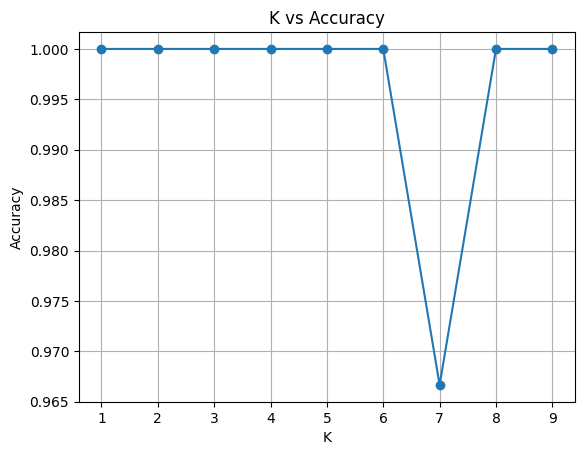

In [15]:
# Plot the curve "K vs accuracy"
plt.plot(k_values, accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()